In [3350]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Question 1**

*1)*

In [3351]:
# 1) Read the CSV (I had to use encoding="latin-1" because the file is encoded in ISO-8859-1)
df = pd.read_csv("airbnb_NYC.csv", encoding="latin-1")
df.head()


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [3352]:
# 2) Quick look at the raw Price values
df["Price"].head(10)

0    145
1     37
2     28
3    199
4    549
5    149
6    250
7     90
8    270
9    290
Name: Price, dtype: str

In [3353]:
# 3) Work on a string copy of Price so I can clean it. I also checked for missing values.
df_price = df["Price"].astype(str)
df_price.isna().sum()

np.int64(0)

In [3354]:
# 4) Remove formatting issues: commas, $, extra spaces
price_str = price_str.str.replace(",", "", regex=False) 
price_str = price_str.str.replace("$", "", regex=False)
price_str = price_str.str.strip()

In [3355]:
# 5) Convert to numeric; invalid values become NaN
df["Price_clean"] = pd.to_numeric(price_str, errors="coerce")


In [3356]:
# 6) Missing values after cleaning
missing_after = df["Price_clean"].isna().sum()
missing_after

np.int64(0)

In [3357]:
#Check if comma is removed, especially for prices > 999
mask = df["Price"].astype(str).str.contains(",", na=False)
df.loc[mask, ["Price", "Price_clean"]].head(10)

,Price,Price_clean
101,"1,990",1990
263,"1,000",1000
764,"1,200",1200
1272,"1,000",1000
1275,"5,000",5000
1476,"3,000",3000
1846,"1,500",1500
1973,"1,200",1200
1977,"1,800",1800
2095,"1,300",1300


I ended up with 0 missing values and cleaned the variable price

*2)*

In [3358]:
df = pd.read_csv("mn_police_use_of_force.csv")
df.head()

,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
0,2016/01/01 00:47:36,Assault in Progress,Yes,DASLT1,NaN,Bodily Force,Body Weight to Pin,Black,Male,20.0,Tensed,1,Downtown East
1,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,Black,Female,27.0,Verbal Non-Compliance,1,Downtown West
2,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,White,Female,23.0,Verbal Non-Compliance,1,Downtown West
3,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
4,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West


In [3359]:
inj_str = df["subject_injury"].astype(str)
inj_str = inj_str.str.strip()
inj_str = inj_str.str.lower()

In [3360]:
inj_str.head(10)

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9     no
Name: subject_injury, dtype: str

In [3361]:
inj_str = inj_str.replace("nan", np.nan)

In [3362]:
df["subject_injury_clean"] = None
df.loc[inj_str == "yes", "subject_injury_clean"] = "Yes"
df.loc[inj_str == "no",  "subject_injury_clean"] = "No"

In [3363]:
#Proportion of missing values
prop_missing = df["subject_injury_clean"].isna().mean()
prop_missing

np.float64(0.7619342359767892)

In [3364]:
pd.crosstab(df["force_type"], df["subject_injury_clean"], dropna=False)

subject_injury_clean,No,Yes,NaN
force_type,,,
Baton,0,2,2
Bodily Force,1093,1286,7051
Chemical Irritant,131,41,1421
Firearm,2,0,0
Gun Point Display,33,44,27
Improvised Weapon,34,40,74
Less Lethal,0,0,87
Less Lethal Projectile,1,2,0
Maximal Restraint Technique,0,0,170


In [3365]:
missing_mask = df["subject_injury_clean"].isna()
# counts of missing vs not missing by force_type
pd.crosstab(df["force_type"], missing_mask, dropna=False)

subject_injury_clean,False,True
force_type,,
Baton,2,2
Bodily Force,2379,7051
Chemical Irritant,172,1421
Firearm,2,0
Gun Point Display,77,27
Improvised Weapon,74,74
Less Lethal,0,87
Less Lethal Projectile,3,0
Maximal Restraint Technique,0,170


In [3366]:
# false means data is not missing
pd.crosstab(df["force_type"], missing_mask, normalize="index").sort_values(True, ascending=False)

subject_injury_clean,False,True
force_type,,
Less Lethal,0.000000,1.000000
Maximal Restraint Technique,0.000000,1.000000
Chemical Irritant,0.107972,0.892028
Taser,0.246366,0.753634
Bodily Force,0.252280,0.747720
Baton,0.500000,0.500000
Improvised Weapon,0.500000,0.500000
Police K9 Bite,0.597403,0.402597
Gun Point Display,0.740385,0.259615


In [3367]:
df["subject_injury_clean"] = df["subject_injury_clean"].fillna("Missing")
df["subject_injury_clean"]

0        Missing
1        Missing
2        Missing
3        Missing
4        Missing
          ...   
12920    Missing
12921    Missing
12922    Missing
12923    Missing
12924    Missing
Name: subject_injury_clean, Length: 12925, dtype: object

I cleaned subject_injury so it only has Yes, No, or missing (standardized the text and kept NaNs as missing). When I cross-tabbed it with force_type, the missing values clearly depend on force type: Less Lethal and Maximal Restraint Technique are 100% missing, and Chemical Irritant/Taser/Bodily Force are missing most of the time, while Firearm and Less Lethal Projectile have basically no missing values. After that, I replaced the remaining NaNs with the label “Missing.”

3)

In [3368]:
df = pd.read_csv("metabric.csv",)
df.head()

,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Chemotherapy,Hormone Therapy,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Overall Survival Status,Radio Therapy,TMB (nonsynonymous),Tumor Size,Tumor Stage
0,43.19,BREAST CONSERVING,Breast Cancer,NO,YES,0.0,2.0,4.020,84.633333,0:LIVING,YES,2.615035,10.0,1.0
1,48.87,MASTECTOMY,Breast Cancer,YES,YES,1.0,2.0,4.030,163.700000,1:DECEASED,NO,2.615035,15.0,2.0
2,47.68,MASTECTOMY,Breast Cancer,YES,YES,3.0,1.0,4.050,164.933333,0:LIVING,YES,1.307518,25.0,2.0
3,76.97,MASTECTOMY,Breast Cancer,YES,YES,8.0,2.0,6.080,41.366667,1:DECEASED,YES,2.615035,40.0,2.0
4,78.77,MASTECTOMY,Breast Cancer,NO,YES,0.0,4.0,4.062,7.800000,1:DECEASED,YES,5.230071,31.0,4.0


In [3369]:
status_str = df["Overall Survival Status"].astype(str)
status_str

0         0:LIVING
1       1:DECEASED
2         0:LIVING
3       1:DECEASED
4       1:DECEASED
           ...    
1338      0:LIVING
1339    1:DECEASED
1340      0:LIVING
1341    1:DECEASED
1342      0:LIVING
Name: Overall Survival Status, Length: 1343, dtype: str

In [3370]:
status_str.isna().sum()

np.int64(0)

In [3371]:
status_str.value_counts().head(10)


Overall Survival Status
1:DECEASED    768
0:LIVING      575
Name: count, dtype: int64

In [3372]:
status_str = status_str.str.strip().str.lower()
df["os_status_dummy"] = None
df.loc[status_str == "0:living",   "os_status_dummy"] = 1
df.loc[status_str == "1:deceased", "os_status_dummy"] = 0

df["os_status_dummy"].value_counts()

os_status_dummy
0    768
1    575
Name: count, dtype: int64

In [3373]:
df[["Overall Survival Status", "os_status_dummy"]]

,Overall Survival Status,os_status_dummy
0,0:LIVING,1
1,1:DECEASED,0
2,0:LIVING,1
3,1:DECEASED,0
4,1:DECEASED,0
...,...,...
1338,0:LIVING,1
1339,1:DECEASED,0
1340,0:LIVING,1
1341,1:DECEASED,0


4)

In [3374]:
df = pd.read_csv("airbnb_NYC.csv", encoding="latin-1")
df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [3375]:
rating = df["Review Scores Rating"]
rating 

0         NaN
1         NaN
2         NaN
3         NaN
4        96.0
         ... 
30473     NaN
30474     NaN
30475     NaN
30476     NaN
30477     NaN
Name: Review Scores Rating, Length: 30478, dtype: float64

In [3376]:
rating_str = rating.astype(str)
rating_str = rating_str.str.strip()
rating_str = rating_str.replace("nan", np.nan)
df["review_rating_num"] = pd.to_numeric(rating_str, errors="coerce")

In [3377]:
# how many missing?
missing_count = df["review_rating_num"].isna().sum()
missing_count

np.int64(8323)

In [3378]:
median_rating = df["Review Scores Rating"].median()
median_rating

np.float64(94.0)

In [3379]:
df["review_rating_new"] = df["Review Scores Rating"].fillna(median_rating)
df["review_rating_new"]

0        94.0
1        94.0
2        94.0
3        94.0
4        96.0
         ... 
30473    94.0
30474    94.0
30475    94.0
30476    94.0
30477    94.0
Name: review_rating_new, Length: 30478, dtype: float64

There are 8323 missing values in Review Scores Rating. I created review_rating_new by filling the missing ratings with the median of the non-missing ratings (94.0). This can bias results because it forces a bunch of listings to have the exact same rating, which shrinks the spread/variation and can make relationships look weaker or cleaner than they really are. Also, the ratings probably aren’t missing randomly (lots of missing ratings might just mean no reviews yet), so filling those with 94 makes those listings look “average-rated” even though they might be systematically different.

**Question 2**

1)

In [3380]:
#install xlrd
!pip install xlrd
df = pd.read_excel("GSAF5.xls") 
df

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,29th January,2026.0,Unprovoked,Brazil,Recife,Del Chifre Beach in Olinda,Swimming,Deivson Rocha Dantas,M,13,...,Unknown bull and tiger sharks frequent the area,Kevin McMurray Trackingsharks.com: TV Globo: P...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29th January,2026.0,Unprovoked,Australia,NSW,Angels Beach East Ballina,Surfing,Unnamed man,M,?,...,Unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24th January,2026.0,Unprovoked,Australia,Tasmania,Cooee Beach west of Burnie,Swimming,Megan Stokes,F,?,...,1.7m Seven Gill shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20th January,2026.0,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,...,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19th January,2026.0,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,...,Bull shark,Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7069,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,...,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0,NaN,NaN
7070,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,...,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0,NaN,NaN
7071,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,...,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0,NaN,NaN
7072,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,...,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0,NaN,NaN


2. 

In [3381]:
df.isna().sum()

Date                 0
Year                 2
Type                18
Country             50
State              487
Location           567
Activity           583
Name               218
Sex                578
Age               2994
Injury              35
Fatal Y/N          561
Time              3527
Species           3131
Source              20
pdf                275
href formula       280
href               278
Case Number        276
Case Number.1      277
original order     275
Unnamed: 21       7073
Unnamed: 22       7072
dtype: int64

In [3382]:
df = df.drop(columns=["Unnamed: 21", "Unnamed: 22"])
df

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Fatal Y/N,Time,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order
0,29th January,2026.0,Unprovoked,Brazil,Recife,Del Chifre Beach in Olinda,Swimming,Deivson Rocha Dantas,M,13,...,Y,?,Unknown bull and tiger sharks frequent the area,Kevin McMurray Trackingsharks.com: TV Globo: P...,NaN,NaN,NaN,NaN,NaN,NaN
1,29th January,2026.0,Unprovoked,Australia,NSW,Angels Beach East Ballina,Surfing,Unnamed man,M,?,...,N,1100hrs,Unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN
2,24th January,2026.0,Unprovoked,Australia,Tasmania,Cooee Beach west of Burnie,Swimming,Megan Stokes,F,?,...,N,1815hrs,1.7m Seven Gill shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN
3,20th January,2026.0,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,...,N,0830hrs,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN
4,19th January,2026.0,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,...,N,1145hrs,Bull shark,Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7069,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,...,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0
7070,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,...,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0
7071,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,...,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0
7072,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,...,Y,NaN,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0


3.

An observation is one incident (one row). Dropping mostly-empty columns removes low-information variables but doesn’t remove incidents, so it doesn’t change the observation unit, whereas dropping rows would.

4.

In [3383]:
year_str = df["Year"].astype(str)
year_str = year_str.str.strip()
year_str = year_str.replace("nan", np.nan)

In [3384]:
#Range is from 0 to 2026
df["year_clean"] = pd.to_numeric(year_str, errors="coerce")
df["year_clean"].min(), df["year_clean"].max()

(np.float64(0.0), np.float64(2026.0))

In [3385]:
#Focus on >1940
df_1940 = df[df["year_clean"] >= 1940]
year_counts = df_1940["year_clean"].value_counts().sort_index()
year_counts.head(), year_counts.tail()

(year_clean
 1940.0    24
 1941.0    27
 1942.0    41
 1943.0    28
 1944.0    31
 Name: count, dtype: int64,
 year_clean
 2022.0     98
 2023.0    109
 2024.0     52
 2025.0     66
 2026.0     12
 Name: count, dtype: int64)

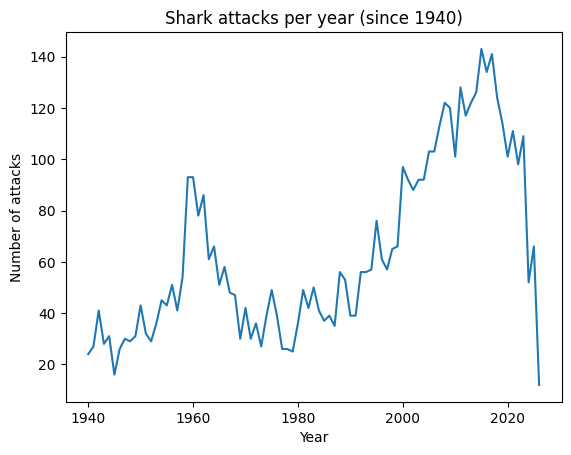

In [3386]:
year_counts.plot(kind="line")
plt.xlabel("Year")
plt.ylabel("Number of attacks")
plt.title("Shark attacks per year (since 1940)")
plt.show()

Increasing long-term, with spikes/dips; recent drop likely due to incomplete recent-year reporting

5.

In [3387]:
age_str = df["Age"].astype(str)
age_str = age_str.str.strip()
age_str = age_str.replace("nan", np.nan)
age_str = age_str.replace("?", np.nan)


df["age_clean"] = pd.to_numeric(age_str, errors="coerce")


df["age_clean"].describe()


count    3925.000000
mean       28.171975
std        14.676367
min         1.000000
25%        17.000000
50%        24.000000
75%        37.000000
max        87.000000
Name: age_clean, dtype: float64

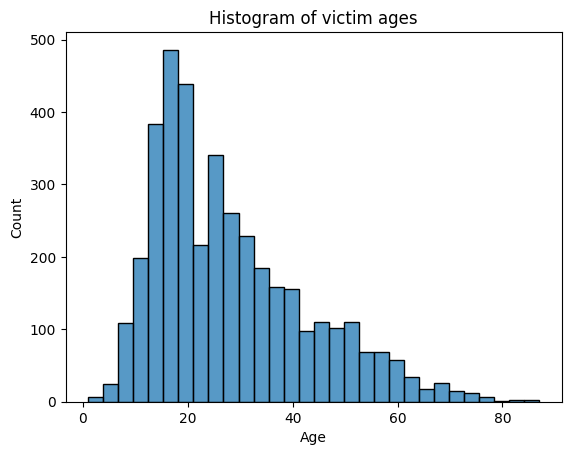

In [3388]:
sns.histplot(df["age_clean"], bins=30)
plt.xlabel("Age")
plt.title("Histogram of victim ages")
plt.show()

6.

In [3389]:
#take 3 values
type_str = df["Type"].astype(str)
type_str = type_str.str.strip().str.lower()
type_str = type_str.replace("nan", np.nan)

df["type_clean"] = "Unknown"
df.loc[type_str == "provoked", "type_clean"] = "Provoked"
df.loc[type_str == "unprovoked", "type_clean"] = "Unprovoked"


In [3390]:
type_counts = df["type_clean"].value_counts(dropna=False)
type_counts

type_clean
Unprovoked    5226
Unknown       1204
Provoked       644
Name: count, dtype: int64

In [3391]:
#Proportion unprovoked
prop_unprovoked = (df["type_clean"] == "Unprovoked").mean()
prop_unprovoked

np.float64(0.7387616624257846)

7.

In [3392]:
fatal_str = df["Fatal Y/N"].astype(str)
fatal_str = fatal_str.str.strip().str.upper()
fatal_str = fatal_str.replace("NAN", np.nan)

df["fatal_clean"] = "Unknown"
df.loc[fatal_str == "Y", "fatal_clean"] = "Y"
df.loc[fatal_str == "N", "fatal_clean"] = "N"

df["fatal_clean"].value_counts()


fatal_clean
N          4942
Y          1489
Unknown     643
Name: count, dtype: int64

8.

In [3393]:
sub = df[
    df["type_clean"].isin(["Provoked", "Unprovoked"]) &
    df["fatal_clean"].isin(["Y", "N"])
].copy()

# fatal rate by type
fatal_rate = (sub["fatal_clean"] == "Y").groupby(sub["type_clean"]).mean()
fatal_rate


type_clean
Provoked      0.033071
Unprovoked    0.246357
Name: fatal_clean, dtype: float64

I filtered the data to only include attacks where type_clean is Provoked or Unprovoked and where fatal_clean is actually known (Y or N) so the comparison is fair with no "unknowns". Then I calculated the fatality rate within each type by turning fatal_clean into a True/False (True if it’s "Y") and taking the mean within each group. Since True counts as 1 and False counts as 0, the mean is basically the proportion fatal for provoked vs unprovoked.
Based on the data, unprovoked attacks are more likely to be fatal than provoked ones

**Question 3**

1)
This paper is about ways and tools that can be used to make the cleaning data process as easy efficient and quickly as possible compared to traditional ways, especially if we are dealing with a huge dataset.

2)
The tidy data standard is basically meant to give a consistent “default” way to organize a dataset so you don’t have to reinvent the structure every time you start cleaning. If the data are arranged in a standard format, it makes initial cleaning + exploration easier, and it also makes different analysis tools work together better so you spend less time reformatting/“translating” the data between tools and more time actually analyzing what’s going on.

3. 
"Like families, tidy datasets are all alike but every messy dataset is messy in its own way." Tidy data sets follow a pretty standard structure while messy data sets follow their own messy structure and can be messy for a lot of different reasons, such as having missing values and having multiple variables comined into one column. “For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general.” Everything in a datset depends on the context and what you're trying to measure, and that is different for every dataset.

4) 
A dataset is a collection of values, where every value belongs to a variable and an observation. A variable is all values that measure the same underlying attribute, like height, temperature and duration of (something). An observation would be the "something" here, the unit on which all variables are measured recorded and assembled.

5. 
Tidy data is defined as a standard way to organize a dataset so its meaning matches its layout. Each variable is a column, each observation is a row, and each type of observation gets its own table

6. 
The five common “messy data” problems are: column headers are actually values, multiple variables get shoved into one column, variables are split between rows and columns, different observational units are mixed in one table, and one observational unit is spread across multiple tables. Table 4 is messy because the income brackets are being used as column headers even though income should be one variable, and the table is really just counts for each religion–income combo. “Melting” fixes this by stacking those income columns into rows so you end up with three clean columns like religion, income (the bracket), and freq (the count).

7.
Table 11 is messy because the day of the month is stored in the column names (d1, d2, d3, …), so the headers are values of a “day” variable instead of real variable names, and the temperature measurements are spread across a bunch of separate day-columns. 
Table 12a is “molten” because it is almost tidy but has one mistake of having the element column contain names of vairables instead of values.
Table 12b is tidy because each column is an actual variable (tmax and tmin), each row is one observation for one station on one date, and the column names are no longer hiding values.

**Question 4**

1.

In [3394]:
df = pd.read_csv("ForeignGifts_edu.csv") 
df.head()

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,102000,Jacksonville State University,Jacksonville,AL,43738,250000,Monetary Gift,CHINA,NaN
1,2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters
2,3,105100,University of Alabama,Tuscaloosa,AL,43466,3649107,Contract,ENGLAND,Springer Nature Customer Service Ce
3,4,105100,University of Alabama,Tuscaloosa,AL,43472,1000,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
4,5,105100,University of Alabama,Tuscaloosa,AL,43479,49476,Contract,SAUDI ARABIA,Saudi Arabia Education Mission


2.

In [3395]:
df["Foreign Gift Amount"].isna().sum()

np.int64(0)

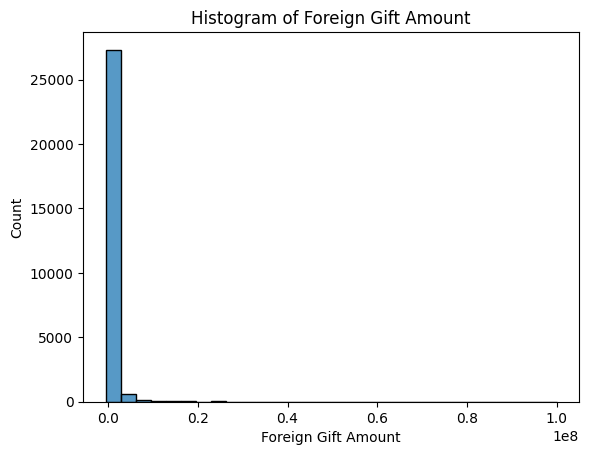

count    2.822100e+04
mean     5.882327e+05
std      3.222011e+06
min     -5.377700e+05
25%      5.700000e+03
50%      9.461500e+04
75%      3.761420e+05
max      1.000000e+08
Name: Foreign Gift Amount, dtype: float64

In [3396]:
sns.histplot(df["Foreign Gift Amount"], bins=30)
plt.xlabel("Foreign Gift Amount")
plt.ylabel("Count")
plt.title("Histogram of Foreign Gift Amount")
plt.show()

df["Foreign Gift Amount"].describe()

Foreign Gift Amount is extremely right-skewed. Most gifts are relatively small, where 25% are ≤ 5,700 and the median is about 94,615. However, there are a few huge gifts that create a long right tail up to 100,000,000. Because of those big outliers, the mean (about 588,233) is much higher than the median and the standard deviation is very large (about 3.22 million). Also, the minimum is negative (−537,770), which suggests there are refunds/adjustments or data entry quirks in the dataset.

3.

In [3397]:
counts = df["Gift Type"].value_counts()
props = df["Gift Type"].value_counts(normalize=True)

pd.DataFrame({"count": counts, "proportion": props}).loc[["Contract", "Real Estate", "Monetary Gift"]]


,count,proportion
Gift Type,,
Contract,17274,0.612097
Real Estate,11,0.000390
Monetary Gift,10936,0.387513


61.2% is Contract, 0.039% is Real Estate and 38.9% is Monetary Gift.

4.

In [3398]:
#What are the top 15 countries in terms of the number of gifts?
top15_ctry_count = df["Country of Giftor"].value_counts().head(15)
top15_ctry_count

Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
Name: count, dtype: int64

In [3399]:
#What are the top 15 countries in terms of the amount given?
top15_ctry_amount = (df.groupby("Country of Giftor")["Foreign Gift Amount"].sum().sort_values(ascending=False).head(15))
top15_ctry_amount

Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                401157692
AUSTRALIA                248409202
Name: Foreign Gift Amount, dtype: int64

5.

In [3400]:
#hat are the top 15 institutions in terms of the total amount of money they receive?
top15_inst_amount = (df.groupby("Institution Name")["Foreign Gift Amount"].sum().sort_values(ascending=False).head(15))
top15_inst_amount

Institution Name
Carnegie Mellon University                       1477922504
Cornell University                               1289937761
Harvard University                                954803610
Massachusetts Institute of Technology             859071692
Yale University                                   613441311
Texas A&M University                              521455050
Johns Hopkins University                          502409595
Northwestern University                           402316221
Georgetown University                             379950511
University of Chicago (The)                       364544338
University of Colorado Boulder                    360173159
Duke University                                   343699498
Brigham Young University                          323509863
Stanford University                               319561362
University of Texas MD Anderson Cancer Center     301527419
Name: Foreign Gift Amount, dtype: int64

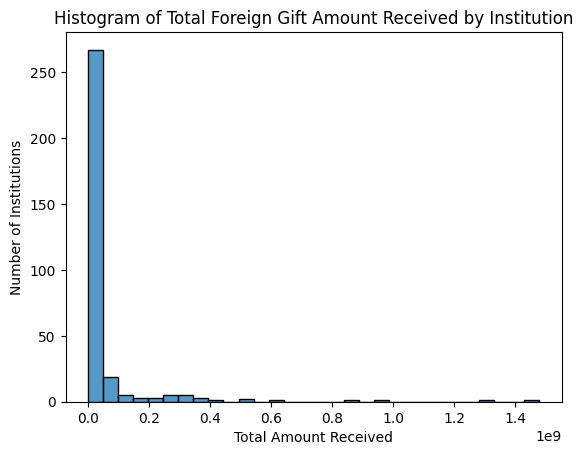

In [3401]:
inst_totals = df.groupby("Institution Name")["Foreign Gift Amount"].sum()

sns.histplot(inst_totals, bins=30)
plt.title("Histogram of Total Foreign Gift Amount Received by Institution")
plt.xlabel("Total Amount Received")
plt.ylabel("Number of Institutions")
plt.show()

6.

In [3402]:
#Which giftors provide the most money, in total?
df.groupby("Giftor Name")["Foreign Gift Amount"].sum().sort_values(ascending=False).head(15)

Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
HCL                                     190000000
Church of Jesus Christ of LDS           185203715
Emirates Institute for Advanced Sc      170641244
QIC                                     148355497
Anonymous #9                             96334996
Qatar National Research Fund             79021705
Government of Saudi Arabia               75192434
Contracting Party                        69996984
CMKL University                          67700000
Royal Embassy of Saudi Arabia            67062486
Name: Foreign Gift Amount, dtype: int64

**Question 5**

1.

In [3403]:
df = pd.read_csv("college_completion.csv")

2.

In [3404]:
df.head()

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [3405]:
df.shape

(3798, 63)

3.

In [3406]:
pd.crosstab(df["control"], df["level"])

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


The crosstab shows that private not-for-profit schools are mostly 4-year, public schools are mostly 2-year, and private for-profit schools are fairly split but slightly more 4-year than 2-year.

4.

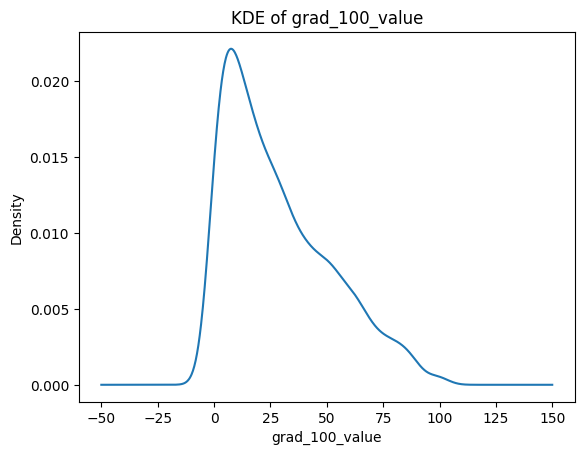

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64

In [3407]:
df["grad_100_value"].plot(kind="kde")
plt.title("KDE of grad_100_value")
plt.xlabel("grad_100_value")
plt.show()

df["grad_100_value"].describe()


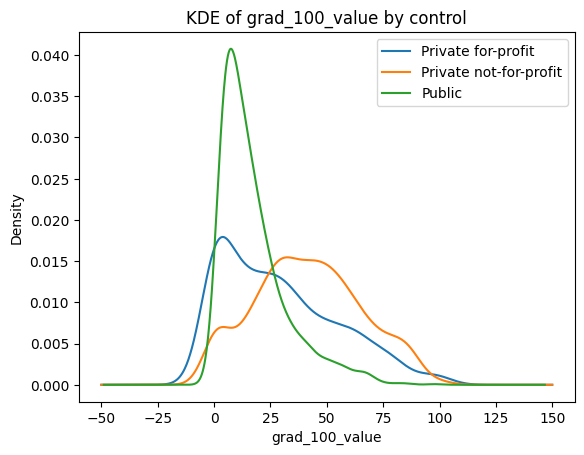

,count,mean,std,min,25%,50%,75%,max
control,,,,,,,,
Private for-profit,779.0,29.108858,25.601687,0.0,6.95,24.7,46.75,100.0
Private not-for-profit,1189.0,41.660976,23.551231,0.0,25.00,41.0,58.30,100.0
Public,1499.0,17.430887,14.729443,0.0,6.90,13.2,23.25,97.8


In [3408]:
for c, sub in df.groupby("control"):
    sub["grad_100_value"].plot(kind="kde", label=c)

plt.title("KDE of grad_100_value by control")
plt.xlabel("grad_100_value")
plt.legend()
plt.show()

df.groupby("control")["grad_100_value"].describe()

Private not-for-profit schools look the most favorable because their graduation rates are shifted higher overall (mean ≈ 41.7 and median ≈ 41), while public schools are the lowest (mean ≈ 17.4 and median ≈ 13.2) and private for-profit is in between (mean ≈ 29.1 and median ≈ 24.7).

5.

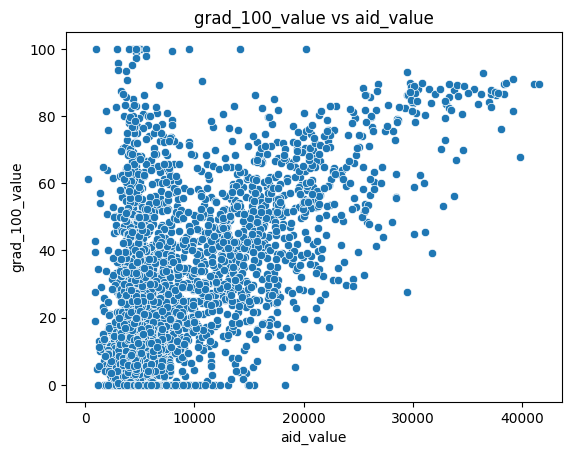

,aid_value,grad_100_value
aid_value,1.000000,0.575879
grad_100_value,0.575879,1.000000


In [3409]:
sns.scatterplot(x=df["aid_value"], y=df["grad_100_value"],data=df)
plt.title("grad_100_value vs aid_value")
plt.xlabel("aid_value")
plt.ylabel("grad_100_value")
plt.show()

df[["aid_value", "grad_100_value"]].cov()
df[["aid_value", "grad_100_value"]].corr()


The scatterplot shows a clear positive relationship between aid_value and grad_100_value. So schools that give more average aid tend to have higher graduation rates, and the correlation is moderately strong at about 0.576. It’s not perfect, but definitely upwards.

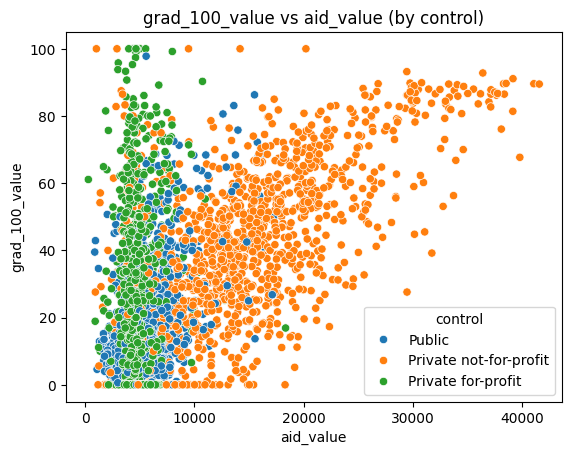

aid_value  grad_100_value
control                                                         
Private for-profit     aid_value        1.000000        0.188363
                       grad_100_value   0.188363        1.000000
Private not-for-profit aid_value        1.000000        0.601591
                       grad_100_value   0.601591        1.000000
Public                 aid_value        1.000000        0.482481
                       grad_100_value   0.482481        1.000000

In [3410]:
sns.scatterplot(data=df, x="aid_value", y="grad_100_value", hue="control")
plt.title("grad_100_value vs aid_value (by control)")
plt.xlabel("aid_value")
plt.ylabel("grad_100_value")
plt.show()

df.groupby("control")[["aid_value", "grad_100_value"]].corr()

When I split it by control, the relationship isn’t the same for every group. Private not-for-profit schools show the clearest pattern where more aid goes with higher graduation rates (corr ≈ 0.60), public schools also trend upward but not as strongly (corr ≈ 0.48), and private for-profit schools barely show a trend at all and are pretty scattered (corr ≈ 0.19). So overall, aid seems to vary positively with graduation rates most for private not-for-profit, then public, and only weakly for for-profit.

**Question 6**

All work in Question6.pdf

**Question 7**

1.

In [3411]:
df = pd.read_csv("ames_prices.csv") 
df.head()

,Order,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,...,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
0,1,526301100,1656,215000,20,RL,141.0,31770,Pave,NaN,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
1,2,526350040,896,105000,20,RH,80.0,11622,Pave,NaN,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
2,3,526351010,1329,172000,20,RL,81.0,14267,Pave,NaN,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
3,4,526353030,2110,244000,20,RL,93.0,11160,Pave,NaN,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
4,5,527105010,1629,189900,60,RL,74.0,13830,Pave,NaN,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [3412]:
df[["price","Bldg.Type"]].head()

,price,Bldg.Type
0,215000,1Fam
1,105000,1Fam
2,172000,1Fam
3,244000,1Fam
4,189900,1Fam


2.

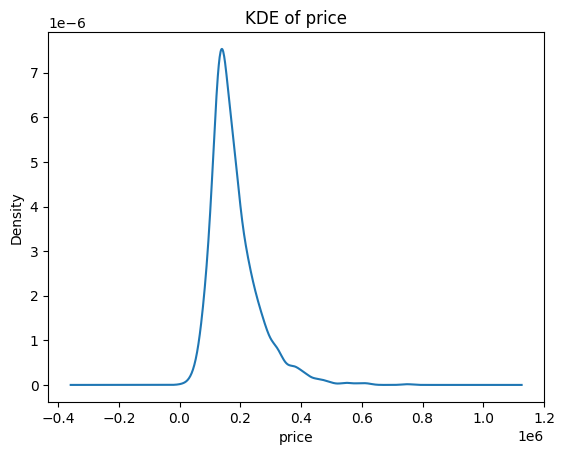

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: price, dtype: float64

In [3413]:
df["price"].plot(kind="kde")
plt.title("KDE of price")
plt.xlabel("price")
plt.show()

df["price"].describe()

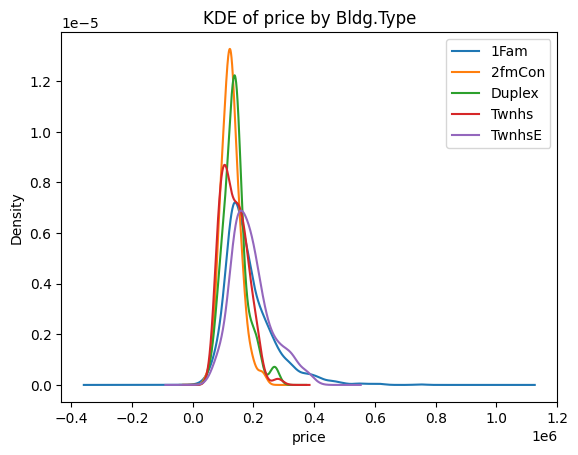

,count,mean,std,min,25%,50%,75%,max
Bldg.Type,,,,,,,,
1Fam,2425.0,184812.041237,82821.802329,12789.0,130000.0,165000.0,220000.0,755000.0
2fmCon,62.0,125581.709677,31089.239840,55000.0,106562.5,122250.0,140000.0,228950.0
Duplex,109.0,139808.935780,39498.973534,61500.0,118858.0,136905.0,153337.0,269500.0
Twnhs,101.0,135934.059406,41938.931130,73000.0,100500.0,130000.0,170000.0,280750.0
TwnhsE,233.0,192311.914163,66191.738021,71000.0,145000.0,180000.0,222000.0,392500.0


In [3414]:
for bt, sub in df.groupby("Bldg.Type"):
    sub["price"].plot(kind="kde", label=bt)

plt.title("KDE of price by Bldg.Type")
plt.xlabel("price")
plt.legend()
plt.show()

df.groupby("Bldg.Type")["price"].describe()


In [3415]:
df.groupby("Bldg.Type")["price"].var().sort_values(ascending=False)

Bldg.Type
1Fam      6.859451e+09
TwnhsE    4.381346e+09
Twnhs     1.758874e+09
Duplex    1.560169e+09
2fmCon    9.665408e+08
Name: price, dtype: float64

Based on the means, the most expensive building types on average are TwnhsE (~192,312) and 1Fam (~184,812).
In terms of variability, 1Fam has the largest spread in prices (std ~82,822; var ~6.86e9), followed by TwnhsE (std ~66,192; var ~4.38e9)

3. 

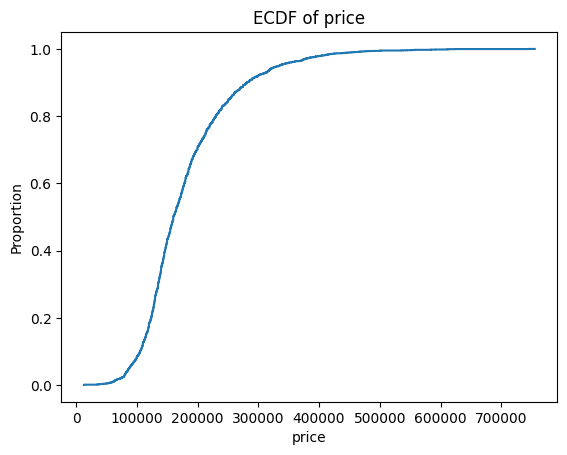

0.00     12789.0
0.25    129500.0
0.50    160000.0
0.75    213500.0
1.00    755000.0
Name: price, dtype: float64

In [3416]:
x = np.sort(df["price"])
y = np.arange(1, len(x)+1) / len(x)

plt.step(x, y)
plt.title("ECDF of price")
plt.xlabel("price")
plt.ylabel("Proportion")
plt.show()

df["price"].quantile([0, .25, .5, .75, 1])


4.

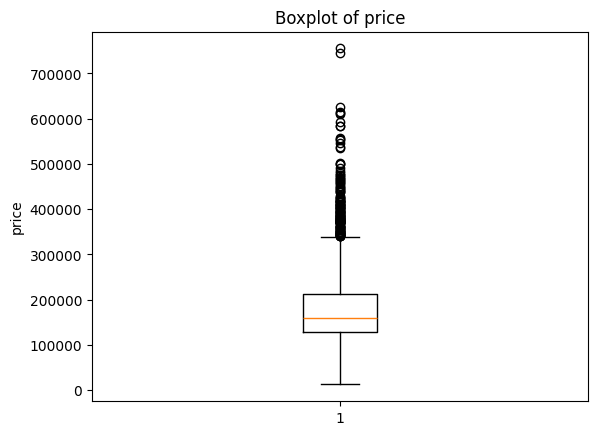

In [3417]:
plt.boxplot(df["price"].dropna())
plt.title("Boxplot of price")
plt.ylabel("price")
plt.show()

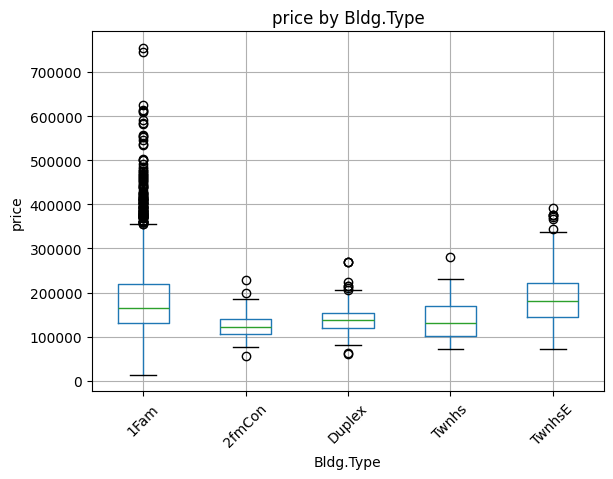

In [3418]:
df.boxplot(column="price", by="Bldg.Type", rot=45)
plt.title("price by Bldg.Type")
plt.suptitle("")
plt.ylabel("price")
plt.show()


From the boxplot, TwnhsE and 1Fam have the highest typical prices (their medians are the highest), while 2fmCon, Duplex, and Twnhs sit lower overall.
Also, 1Fam clearly has the biggest spread and the most extreme high outliers, with lots of points above the top whisker. TwnhsE also has some high outliers but not as many as 1Fam.

5.

In [3419]:
Q1 = df["price"].quantile(.25)
Q3 = df["price"].quantile(.75)
IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

df["outlier"] = ((df["price"] < lower) | (df["price"] > upper)).astype(int)
df["outlier"].value_counts()


outlier
0    2793
1     137
Name: count, dtype: int64

6.

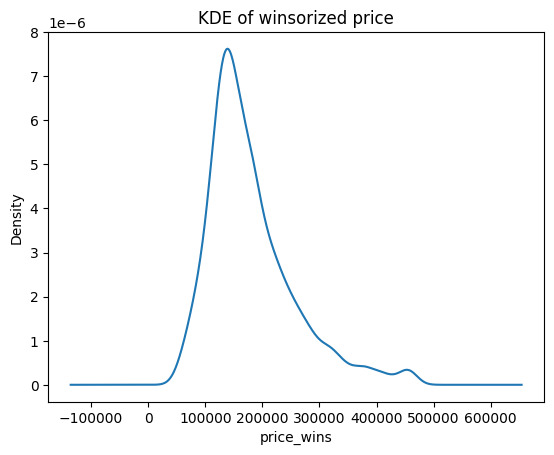

count      2930.000000
mean     180091.154334
std       75842.579174
min       61756.070000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      456666.370000
Name: price_wins, dtype: float64

In [3420]:
lo = df["price"].quantile(.01)
hi = df["price"].quantile(.99)

df["price_wins"] = df["price"].clip(lo, hi)

df["price_wins"].plot(kind="kde")
plt.title("KDE of winsorized price")
plt.xlabel("price_wins")
plt.show()

df["price_wins"].describe()


Ater winsorizing, the distribution is still right-skewed, but the extreme tail is much less influential because very small and very large prices are capped. This shows up in the summary statistics: the minimum increases from 12,789 to about 61,756 and the maximum decreases from 755,000 to about 456,666. As a result, the standard deviation decreases (about 79,887 → 75,843), meaning the spread is smaller once outliers are limited. Meanwhile, the median and quartiles stay the same, so winsorizing mainly changes the extremes rather than the typical home price.